In [1]:
import ast
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

# Get the data

In [2]:
test = pd.read_csv('data/' + 'test.csv')
train = pd.read_csv('data/' + 'train.csv')
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

# Explore the data to gain insights

In [4]:
train_copy = train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ad68dbd50>,
      dtype=object)

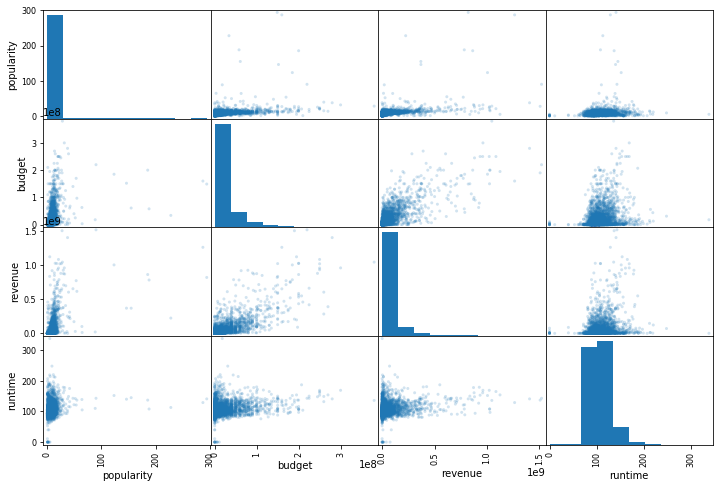

In [5]:
attributes = ["popularity", "budget", "revenue",
             "runtime"]
scatter_matrix(train_copy[attributes], figsize=(12,8), alpha=0.2)

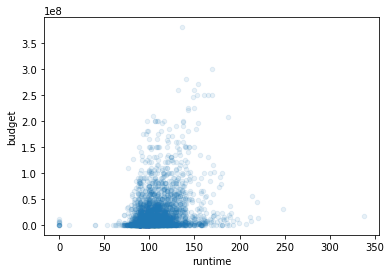

In [6]:
train_copy.plot(kind="scatter", x="runtime", y="budget", alpha=0.1)

# Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.

In [7]:
def collectionBooleanifier(collection):

    newCollection = []

    newVal = 0
    for x in collection:
        if x != x:
            newVal = 0
        else:
            newVal = 1
        newCollection.append(newVal) 
        
    return newCollection

In [8]:
train_copy['has_collection'] = collectionBooleanifier(train_copy['belongs_to_collection'])
train_copy['has_homepage'] = collectionBooleanifier(train_copy['homepage'])

train_copy = train_copy.drop(['belongs_to_collection'], axis=1)
train_copy = train_copy.drop(['homepage'], axis=1)

In [9]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                      3000 non-null int64
budget                  3000 non-null int64
genres                  2993 non-null object
imdb_id                 3000 non-null object
original_language       3000 non-null object
original_title          3000 non-null object
overview                2992 non-null object
popularity              3000 non-null float64
poster_path             2999 non-null object
production_companies    2844 non-null object
production_countries    2945 non-null object
release_date            3000 non-null object
runtime                 2998 non-null float64
spoken_languages        2980 non-null object
status                  3000 non-null object
tagline                 2403 non-null object
title                   3000 non-null object
Keywords                2724 non-null object
cast                    2987 non-null object
crew                    2984 non-null 

In [10]:
train_copy.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,has_collection,has_homepage
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,0
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,0
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,1
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,1
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0


In [11]:

for i, e in enumerate(train['genres'][:5]):
    print(i, e)


0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [12]:
#Get all names for the genres
names = []
def namesOfGenres():
    for l in train_copy['genres']:
        if l == l:
            a = ast.literal_eval(l)
            for x in a:
                text = {'id': x['id'], 'name': x['name'].replace(" ", "_").lower()}
                if text not in names:
                    names.append(text)
    
namesOfGenres()
names

[{'id': 35, 'name': 'comedy'},
 {'id': 18, 'name': 'drama'},
 {'id': 10751, 'name': 'family'},
 {'id': 10749, 'name': 'romance'},
 {'id': 53, 'name': 'thriller'},
 {'id': 28, 'name': 'action'},
 {'id': 16, 'name': 'animation'},
 {'id': 12, 'name': 'adventure'},
 {'id': 27, 'name': 'horror'},
 {'id': 99, 'name': 'documentary'},
 {'id': 10402, 'name': 'music'},
 {'id': 80, 'name': 'crime'},
 {'id': 878, 'name': 'science_fiction'},
 {'id': 9648, 'name': 'mystery'},
 {'id': 10769, 'name': 'foreign'},
 {'id': 14, 'name': 'fantasy'},
 {'id': 10752, 'name': 'war'},
 {'id': 37, 'name': 'western'},
 {'id': 36, 'name': 'history'},
 {'id': 10770, 'name': 'tv_movie'}]

In [13]:
#onehot per row

genres = []

def genresToInt():
    for l in train_copy['genres']:
        res =  [0] * len(names)
        
        if l == l:
            a = ast.literal_eval(l)
            for i in range(0, len(names)):
                for g in a:
                    if g == names[i]:
                        res[i] = 1
        
        genres.append(res)
                        
genresToInt()

In [14]:
#Create colloms

def createCollomnDown2D(name, arr, index, data):
    newArr = []
    for row in arr:
        newArr.append(row[index])
    
    data[name] = newArr

for i in range(0, len(names)):
    createCollomnDown2D("has_genre_" + names[i]['name'], 
                        genres, 
                        i, 
                        train_copy)

# It works!!
train_copy['has_genre_comedy'].head()

0    0
1    0
2    0
3    0
4    0
Name: has_genre_comedy, dtype: int64

In [15]:
train_copy['release_date']

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

In [16]:
month = []
year = []

def monthAndYearConv():
    for t in train_copy['release_date']:
        split_arr = t.split('/')
        month.append(int(split_arr[0]))

        yearInt = int(split_arr[2])
        if(yearInt < 20):
            year.append(2000 + yearInt)
        else:
            year.append(1900 + yearInt)
        
monthAndYearConv()

In [17]:
len(month)

3000

In [18]:
type(month[0])

int

In [19]:
len(year)

3000

In [20]:
train_copy['release_month'] = month
train_copy['release_year'] = year

In [21]:
# remove old genre collomn
train_copy = train_copy.drop(['release_date'], axis=1)
train_copy = train_copy.drop(['genres'], axis=1)

train_copy = train_copy.drop(['imdb_id'], axis=1)
train_copy = train_copy.drop(['original_language'], axis=1)
train_copy = train_copy.drop(['poster_path'], axis=1)

In [22]:
newRuntimes = []
for x in train_copy['runtime']:
    if x == x:
        newRuntimes.append(int(x))
    else:
        newRuntimes.append(0)
        
len(newRuntimes)

3000

In [23]:
train_copy['runtime'] = newRuntimes

In [24]:
statusOnehot = []
for x in train_copy['status']:
    if x == "Released":
        statusOnehot.append(1)
    else:
        statusOnehot.append(0)

len(statusOnehot)

3000

In [25]:
train_copy['status'] = statusOnehot

In [26]:
def language_encoder(column):

    newLang = [0] * 3000
    
    i = 0
    for x in train_copy['spoken_languages']:
        if x == x:
            ds = ast.literal_eval(x)
            if any(d['iso_639_1'] == 'en' for d in ds):
                newLang[i] = 1
        else:
            newLang[i] = 1 #setter den til engelsk hvis språk ikke er satt. (fordi det er flest engelske)
        i+=1
    
    return newLang

In [27]:
train_copy['has_english'] = language_encoder(train_copy['spoken_languages'])
#lang_printer(train_copy['spoken_languages'])

In [28]:
train_copy = train_copy.drop(['spoken_languages'], axis=1)

In [29]:
# Remove rest, might use later

train_copy = train_copy.drop(['original_title'], axis=1)
train_copy = train_copy.drop(['overview'], axis=1)
train_copy = train_copy.drop(['production_companies'], axis=1)
train_copy = train_copy.drop(['production_countries'], axis=1)
train_copy = train_copy.drop(['tagline'], axis=1)
train_copy = train_copy.drop(['title'], axis=1)
train_copy = train_copy.drop(['Keywords'], axis=1)
train_copy = train_copy.drop(['cast'], axis=1)
train_copy = train_copy.drop(['crew'], axis=1)

In [30]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
id                           3000 non-null int64
budget                       3000 non-null int64
popularity                   3000 non-null float64
runtime                      3000 non-null int64
status                       3000 non-null int64
revenue                      3000 non-null int64
has_collection               3000 non-null int64
has_homepage                 3000 non-null int64
has_genre_comedy             3000 non-null int64
has_genre_drama              3000 non-null int64
has_genre_family             3000 non-null int64
has_genre_romance            3000 non-null int64
has_genre_thriller           3000 non-null int64
has_genre_action             3000 non-null int64
has_genre_animation          3000 non-null int64
has_genre_adventure          3000 non-null int64
has_genre_horror             3000 non-null int64
has_genre_documentary        3000 non-null int64
has_genre

In [31]:
train_copy['popularity']

0        6.575393
1        8.248895
2       64.299990
3        3.174936
4        1.148070
          ...    
2995     9.853270
2996     3.727996
2997    14.482345
2998    15.725542
2999    10.512109
Name: popularity, Length: 3000, dtype: float64

# Train

In [35]:
train = train_copy.copy()
X = train.drop(['id', 'revenue'], axis=1)
y = train['revenue'].copy()
X_test = test.drop(['id'], axis=1)

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

81810545.27403499